# What are the top 10 artists by sales?

In [34]:
# 安裝套件
!pip install vanna -q

In [ ]:
# 下載範例資料庫
!wget https://vanna.ai/Chinook.sqlite -O Chinook.sqlite

In [36]:
# 解析資料庫表單
import pandas as pd
# Create your connection.
cnx = sqlite3.connect('Chinook.sqlite')
df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type = 'table'", cnx)
df

,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


In [39]:
# 解析專輯表單
import pandas as pd
# Create your connection.
cnx = sqlite3.connect('Chinook.sqlite')
df = pd.read_sql_query("SELECT * FROM 'Artist'", cnx)
df

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble


In [ ]:
# 解析銷售量表單
import pandas as pd
# Create your connection.
cnx = sqlite3.connect('Chinook.sqlite')
df = pd.read_sql_query("SELECT * FROM 'InvoiceLine'", cnx)
df

[{'role': 'system', 'content': "You are a SQLite expert. \n===Tables \nCREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])\n)\n\nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INTEGER  NOT NULL,\n    [Bytes] INTEGER,\n    [UnitPrice] NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT [PK_Track] PRIMARY KEY  ([TrackId]),\n    FOREIGN KEY ([AlbumId]) REFERENCES [Album] ([Album

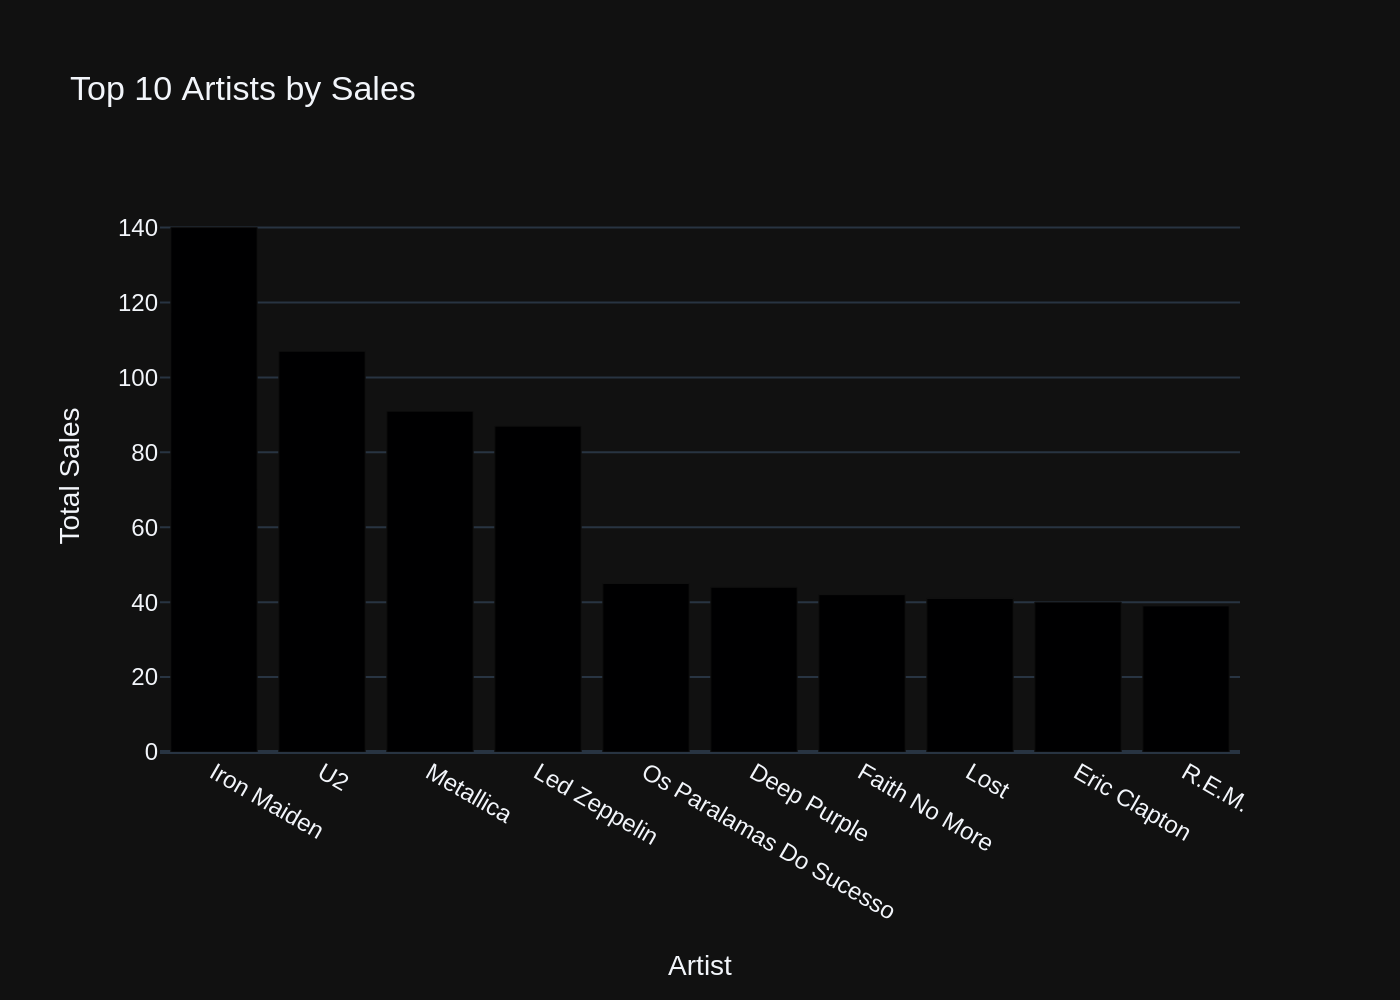

('SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales\nFROM Artist a\nJOIN Album al ON a.ArtistId = al.ArtistId\nJOIN Track t ON al.AlbumId = t.AlbumId\nJOIN InvoiceLine il ON t.TrackId = il.TrackId\nGROUP BY a.ArtistId, a.Name\nORDER BY TotalSales DESC\nLIMIT 10;',
    ArtistId                     Name  TotalSales
 0        90              Iron Maiden         140
 1       150                       U2         107
 2        50                Metallica          91
 3        22             Led Zeppelin          87
 4       113  Os Paralamas Do Sucesso          45
 5        58              Deep Purple          44
 6        82            Faith No More          42
 7       149                     Lost          41
 8        81             Eric Clapton          40
 9       124                   R.E.M.          39,
 None)

In [47]:
# 問題查詢
from vanna.remote import VannaDefault
vn = VannaDefault(model='chinook', api_key='33d0da518bfa4e4489e38cbeb62bc808')
vn.connect_to_sqlite('Chinook.sqlite')
vn.ask('What are the top 10 artists by sales?')

In [ ]:
!git clone https://github.com/vanna-ai/notebooks.git